

# Predicting the Heating Load and Cooling Load requirements for building using multi-class classification or Regression 

--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------



## 1. Problem Definition
> Predict the energy efficiency in terms of `Heating Load` and `Cooling Load` from a given building, given Attributes, orientation and geometry of a building.

## 2. Data
The data is downloaded from Kaggle:
https://www.kaggle.com/datasets/ujjwalchowdhury/energy-efficiency-data-set

## 3. Evaluation 
Depeding on whether the problem is treated as Regression or Multi-Classfication:
Evaluation would be done with:

`Multiclassfication:` 
- Accuracy
- Precision
- Recall
- F1 Score
- ROC Curve

`Regression:`
- R2 Score
- MAE
- MSE

## 4. Features
There are a total of 8 features for the prediction of 2 y-value
- RelativeCompactness
- SurfaceArea
- WallArea
- RoofArea
- OverallHeight
- Orientation
- GlazingArea
- GlazingAreaDistribution

Predict:
- HeatingLoad
- CoolingLoad

## 0. Understanding the Data

In [96]:
#Setting up and importing the libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

%matplotlib inline

In [97]:
df = pd.read_csv('data/energy_efficiency_data.csv')

In [98]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [100]:
df.isna().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

Since the data are all in floats and has no missing values, there's no need to clean the data.

## Histogram of the features 

Finding out the data distribution and whether they are continous

In [101]:
type(df.columns)

pandas.core.indexes.base.Index

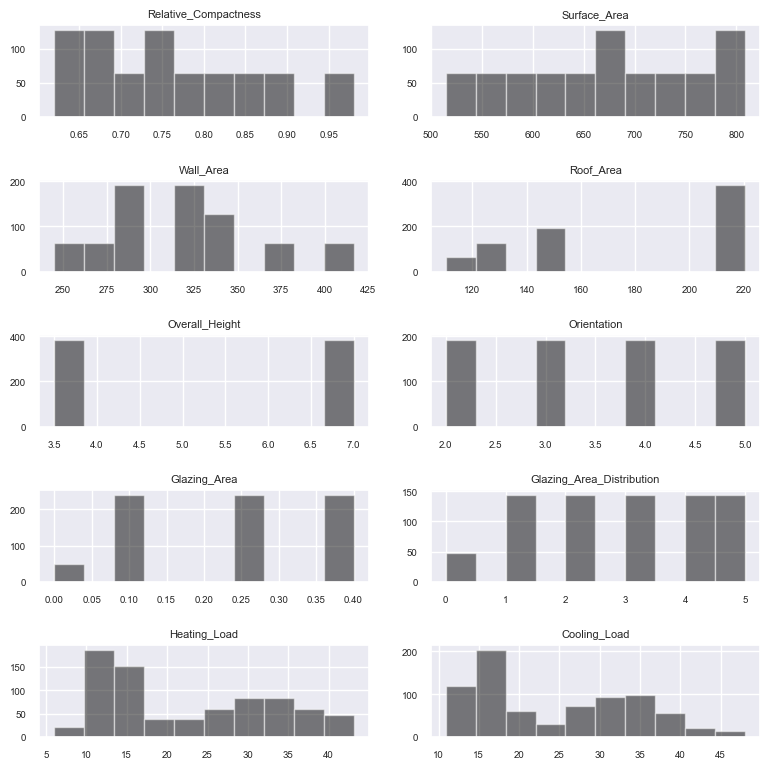

In [102]:
feature_list = list(df.columns)
fig,axs = plt.subplots(5,2, figsize = (8,8))

k = 0

for i in range(5):
    for j in range(2):
        axs[i,j].set_title(feature_list[k], fontsize= 8 )
        axs[i,j].hist(x = df[feature_list[k]], alpha = 0.5, color = 'black')
        axs[i,j].tick_params(labelsize = 7)
        k +=1


fig.tight_layout(pad = 1.5)

## Chart plot for certain features
Trying to understand the linear relationship between the features and the two labels with
- Correlation Matrix
- Chat plot with some of the features.

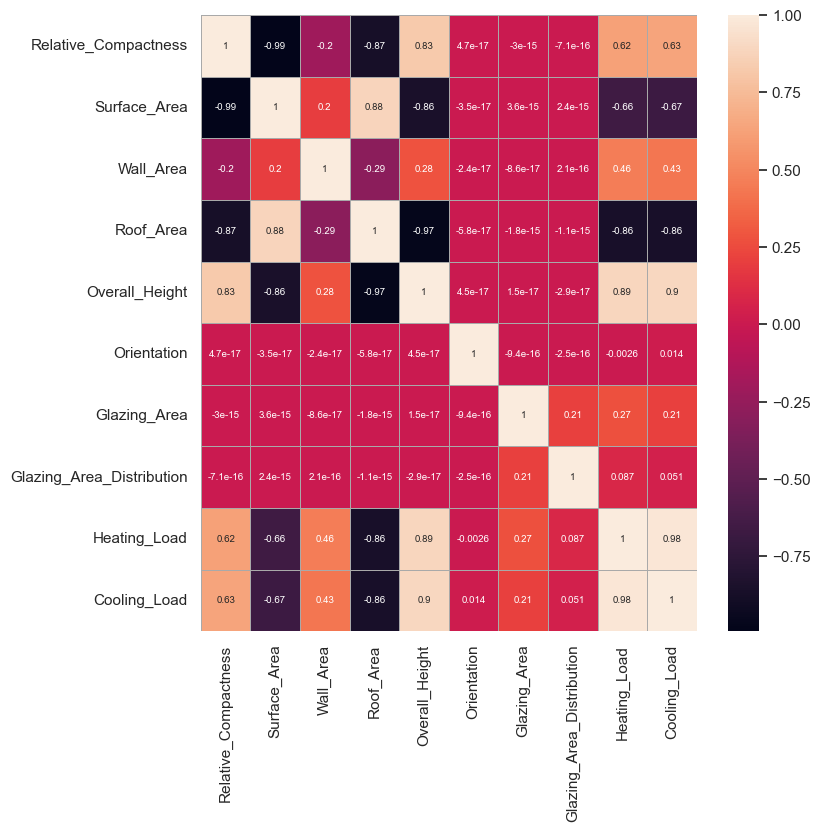

In [103]:
#Spliting the data 
fig, ax = plt.subplots(figsize=(8,8))
sns.set(font_scale= 1)
plt = sns.heatmap(df.corr(), annot = True, cbar = True, linecolor = 'darkgrey', linewidth= 0.5, annot_kws= {'size':7})

from the above correlation matrix, you can see some of the features affect Heating and Cooling_load more
for examples:
- Overall_Height (Positive Correlation)
- Relative Compactness (Positive Correlation)
- Surface Area(Neagtive Correlation)
- Roof Area(Neagtive Correlation))

In [104]:
df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

In [105]:
# # #Chart for certain features

# key_list =['Overall_Height', 'Relative_Compactness', 'Surface_Area', 'Roof_Area']

# # fig_1, ax_1 = plt.subplots(figsize=(8,8))
# for i in key_list:
#     df[i].plot(df['Heating_Load'], colour = 'tab:orange')
#     df[i].plot(df['Colling_Load'], colour = 'tab:blue')